# Data Science is all about finding valuable insight from the given dataset.Inshort,finding answer's that could help in business.So, let us try to ask some questions reg. IPL.

In [1]:
import numpy as np # numerical computing 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #modern visualization
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
matches = pd.read_csv('matches.csv')
matches.shape

(636, 18)

In [3]:
print(matches.head())

   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

In [4]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


# How many matches we have got in dataset

In [6]:
matches['id'].max()

636

# How many seasons we've got in the dataset?

In [7]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [8]:
len(matches['season'].unique())

10

# Which Team had won by maximum runs?

In [9]:
team_won_max_runs = matches.iloc[matches['win_by_runs'].idxmax()]
print(team_won_max_runs)

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


In [10]:
##We have one more method to solve this problem
max_runs = matches['win_by_runs'].max()
team_name = matches[matches['win_by_runs']==max_runs]
print(team_name)

    id  season   city        date           team1             team2  \
43  44    2017  Delhi  2017-05-06  Mumbai Indians  Delhi Daredevils   

         toss_winner toss_decision  result  dl_applied          winner  \
43  Delhi Daredevils         field  normal           0  Mumbai Indians   

    win_by_runs  win_by_wickets player_of_match             venue  \
43          146               0     LMP Simmons  Feroz Shah Kotla   

        umpire1    umpire2  umpire3  
43  Nitin Menon  CK Nandan      NaN  


# Which Team had won by maximum wicket?

In [11]:
team_won_by_max_wic = matches.iloc[matches['win_by_wickets'].idxmax()]
print(team_won_by_max_wic)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [12]:
##we can also use same approach for this problem as we use in previous question
team_max_wic = matches['win_by_wickets'].max()
print(matches[matches['win_by_wickets']==team_max_wic])

      id  season        city        date             team1  \
2      3    2017      Rajkot  2017-04-07     Gujarat Lions   
34    35    2017  Chandigarh  2017-04-30  Delhi Daredevils   
71    72    2008      Mumbai  2008-04-27    Mumbai Indians   
119  120    2009   Cape Town  2009-04-19   Kings XI Punjab   
183  184    2010   Bangalore  2010-03-18  Rajasthan Royals   
298  299    2011      Mumbai  2011-05-20    Mumbai Indians   
376  377    2012      Jaipur  2012-05-20  Rajasthan Royals   
390  391    2013  Chandigarh  2013-04-10   Kings XI Punjab   
542  543    2015       Delhi  2015-04-26  Delhi Daredevils   
590  591    2016      Rajkot  2016-04-21     Gujarat Lions   

                           team2                  toss_winner toss_decision  \
2          Kolkata Knight Riders        Kolkata Knight Riders         field   
34               Kings XI Punjab              Kings XI Punjab         field   
71               Deccan Chargers              Deccan Chargers         field   
1

# Which Team had won by closest Margin (minimum runs)

In [13]:
## Here there are lot's of row's they have 0 in win by runs column's so we have to skip them.
win_by_close = matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]
print(win_by_close)

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

# Which Team had won by minimum wicket?

In [32]:
team_with_min_wicket = matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]
print(team_with_min_wicket)

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object


# Which Season had most number of matches?

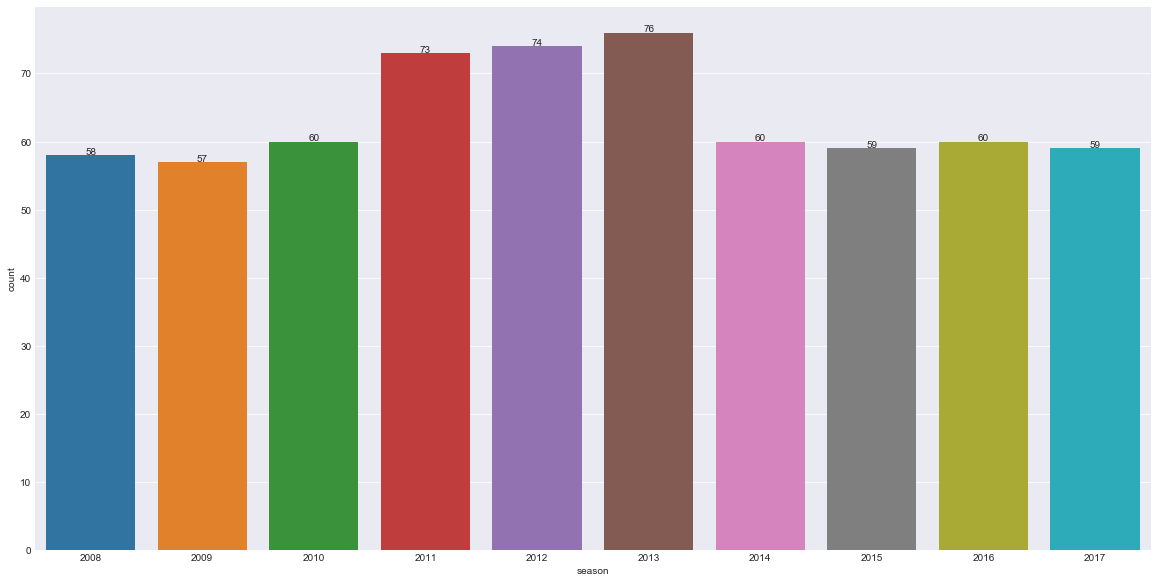

In [45]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='season', data=matches)
#graph.set_xticklabels(graph.get_xticklabels(),rotation=90) #this help's to rotate x axis by 90
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

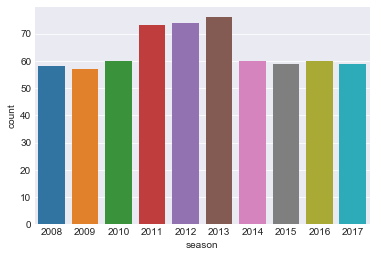

In [46]:
##another simple method for solving this problem

sns.countplot(x='season',data=matches)
plt.show()

# Which IPL Team is more successful?

In [49]:
##so for solving this problem we can directly apply count plot on winner column

successful_team = matches['winner'].value_counts()
print(successful_team)

##so here we can see that MI is successful team in IPL.

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64


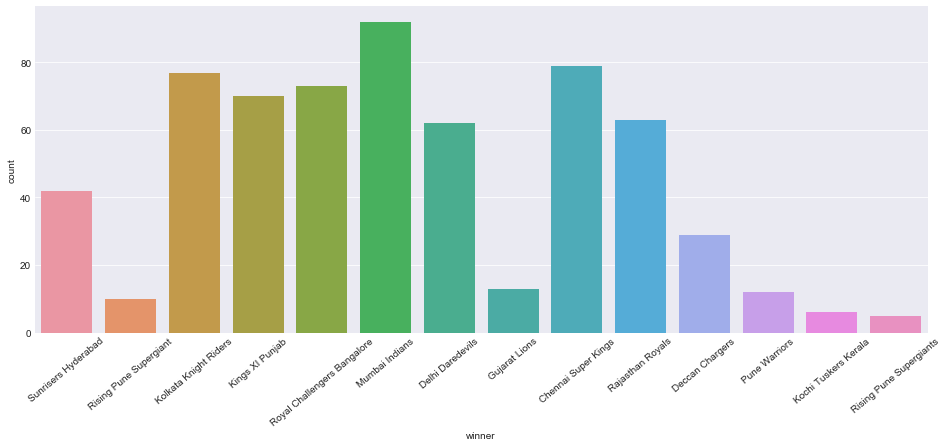

In [58]:
##We can also use data visualization to solve this problem
plt.figure(figsize=(16,6))
ax = sns.countplot(x='winner',data=matches)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40) #here we have to rotate x axis by 40 .
plt.show()

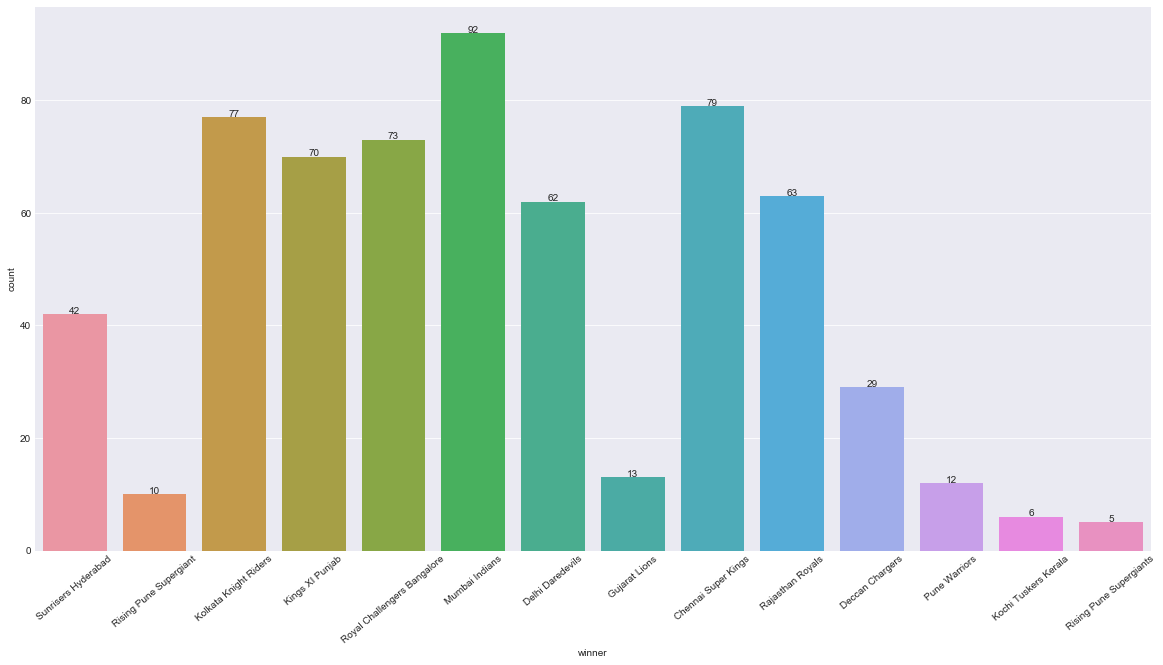

In [61]:
 ## we can also make this visualization more effecient or better

fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='winner', data=matches)

graph.set_xticklabels(graph.get_xticklabels(),rotation=40) #this help's to rotate x axis by 90
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

# Has Toss-winning helped in winning matches?

In [64]:
#matches.head()
toss_win_match = matches['toss_winner'] == matches['winner']
#print(toss_win_match)
toss_win_match.value_counts()

True     325
False    311
dtype: int64

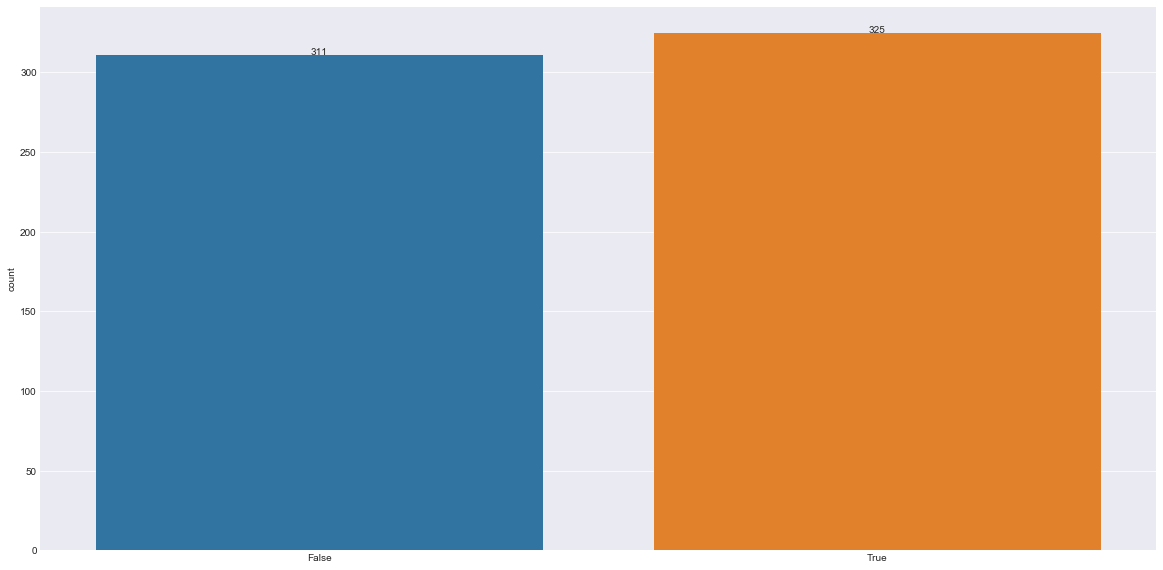

In [69]:
fig,ax1 =  plt.subplots(figsize=(20,10))
graph = sns.countplot(toss_win_match)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    
##Here we can see that usually toss does not effect on result    

# Top Player Of Match Winner

In [76]:
#matches.head()
##Here are i'm looking for only top 10 Match Winner
match_winners = matches['player_of_match'].value_counts()[:10]
print(match_winners)


CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
G Gambhir         13
MS Dhoni          13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64


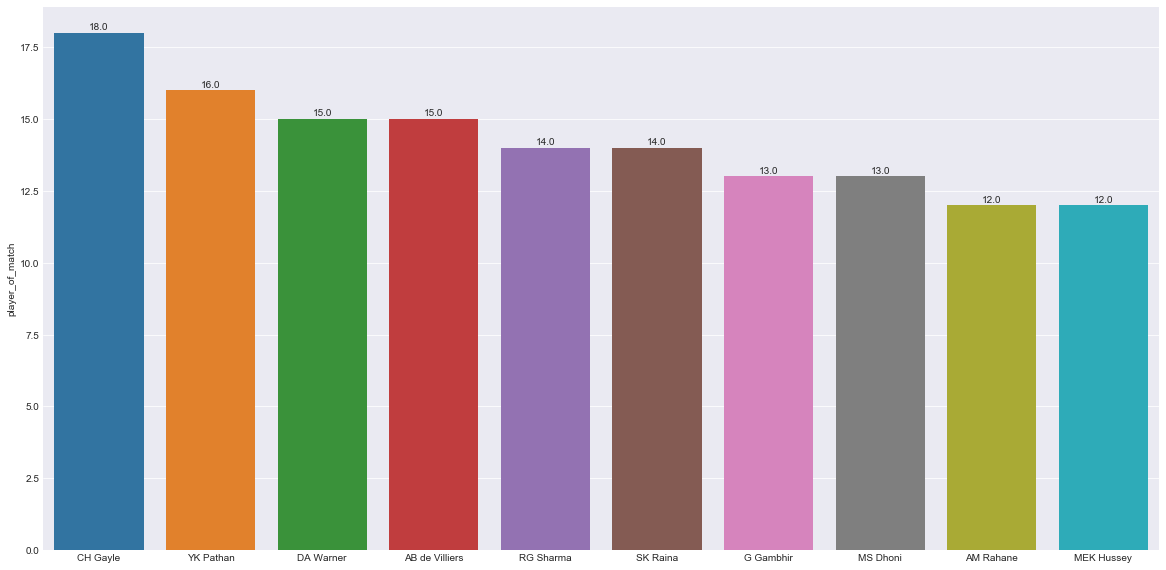

In [105]:
##visualizing this data set
#sns.countplot(x='player_of_match',data=matches)
fig, ax1 = plt.subplots(figsize=(20,10))
#ax.set_ylim([10,30])

ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
graph = sns.barplot(x = match_winners.index, y = match_winners, orient='v'); #palette="Blues");
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.show()

##so here Univese Boss Chris gayle is Top on the list!!

# Team Perfomance

In [102]:
##On the basis of Win_By_Runs

Team_perfo = matches[matches['win_by_runs']>0].groupby('winner')['win_by_runs'].apply(np.median).sort_values(ascending=False)
print(Team_perfo)

winner
Rajasthan Royals               31.0
Rising Pune Supergiants        26.5
Mumbai Indians                 25.0
Chennai Super Kings            24.0
Pune Warriors                  23.0
Kolkata Knight Riders          23.0
Royal Challengers Bangalore    22.5
Kings XI Punjab                22.5
Rising Pune Supergiant         20.0
Delhi Daredevils               17.0
Sunrisers Hyderabad            16.0
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64


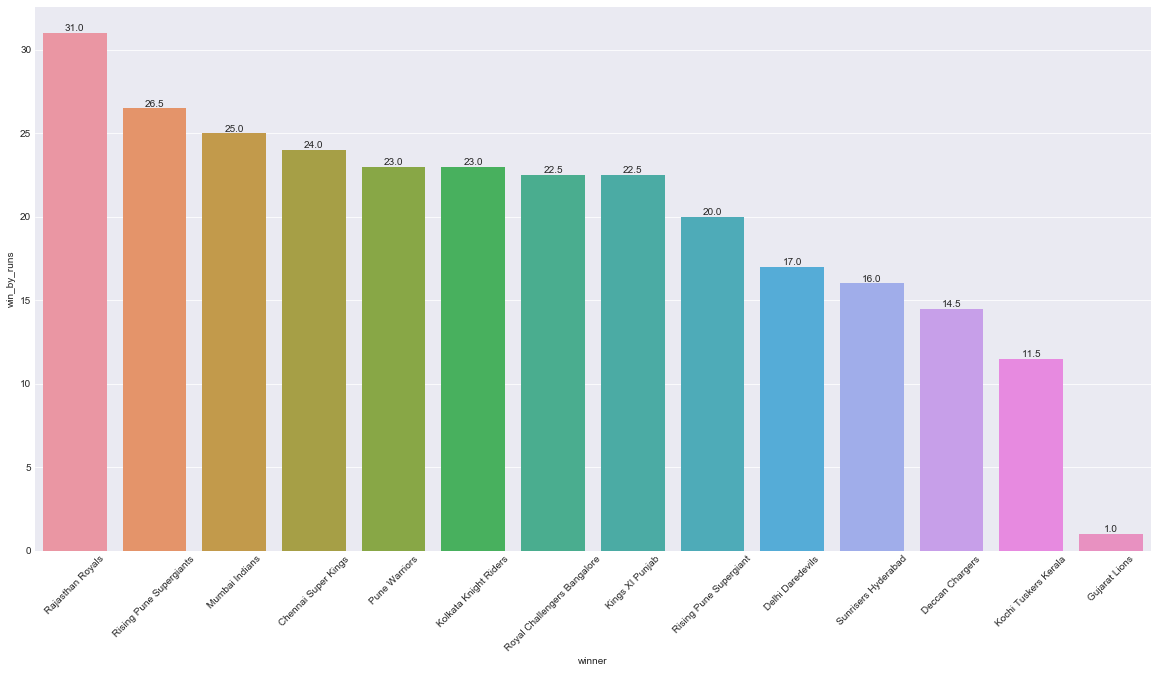

In [110]:
fig,ax = plt.subplots(figsize=(20,10))
graph = sns.barplot(x=Team_perfo.index,y=Team_perfo)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.show()

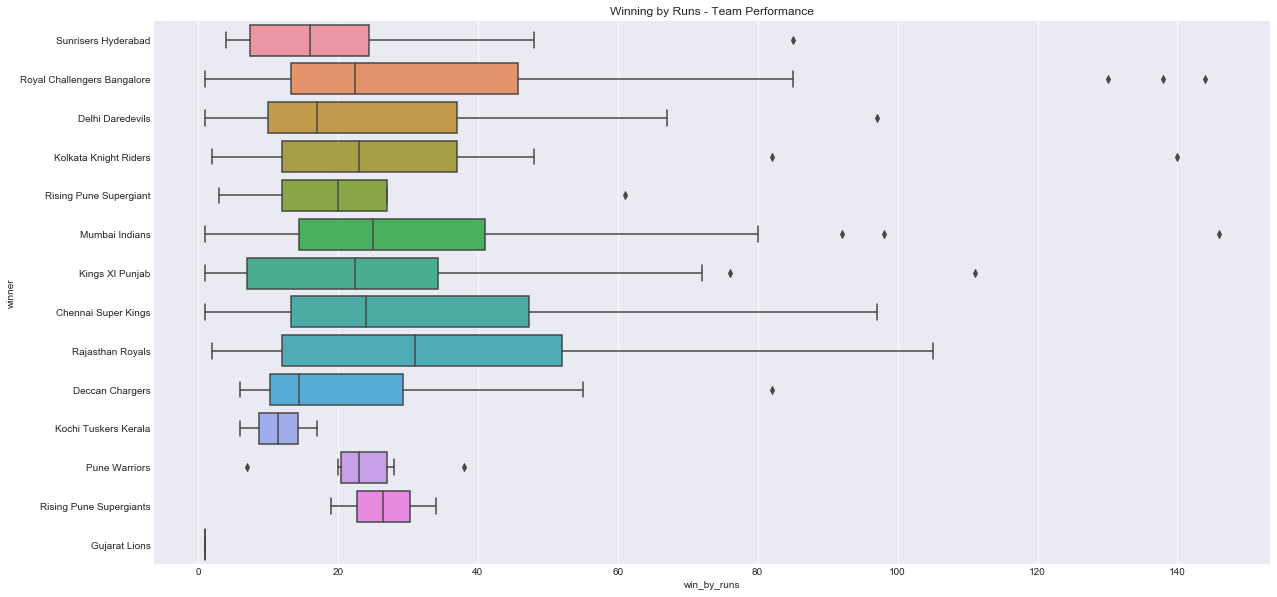

In [112]:
##Measuring Team perfomace with help of boxplot
fig, ax = plt.subplots(figsize=(20,10))

ax.set_title("Winning by Runs - Team Performance")

sns.boxplot(y = 'winner', x = 'win_by_runs', data=matches[matches['win_by_runs']>0], orient = 'h'); #palette="Blues");
plt.show()

In [114]:
##Now calculate Team Perfomance on the basis on win by wicket's
team_won_wicket = matches[matches['win_by_wickets']>0].groupby('winner')['win_by_wickets'].apply(np.median).sort_values(ascending=False)
print(team_won_wicket)

winner
Kochi Tuskers Kerala           7.5
Sunrisers Hyderabad            7.0
Royal Challengers Bangalore    7.0
Rising Pune Supergiants        7.0
Kolkata Knight Riders          7.0
Pune Warriors                  6.5
Rising Pune Supergiant         6.0
Rajasthan Royals               6.0
Mumbai Indians                 6.0
Kings XI Punjab                6.0
Gujarat Lions                  6.0
Delhi Daredevils               6.0
Deccan Chargers                6.0
Chennai Super Kings            6.0
Name: win_by_wickets, dtype: float64


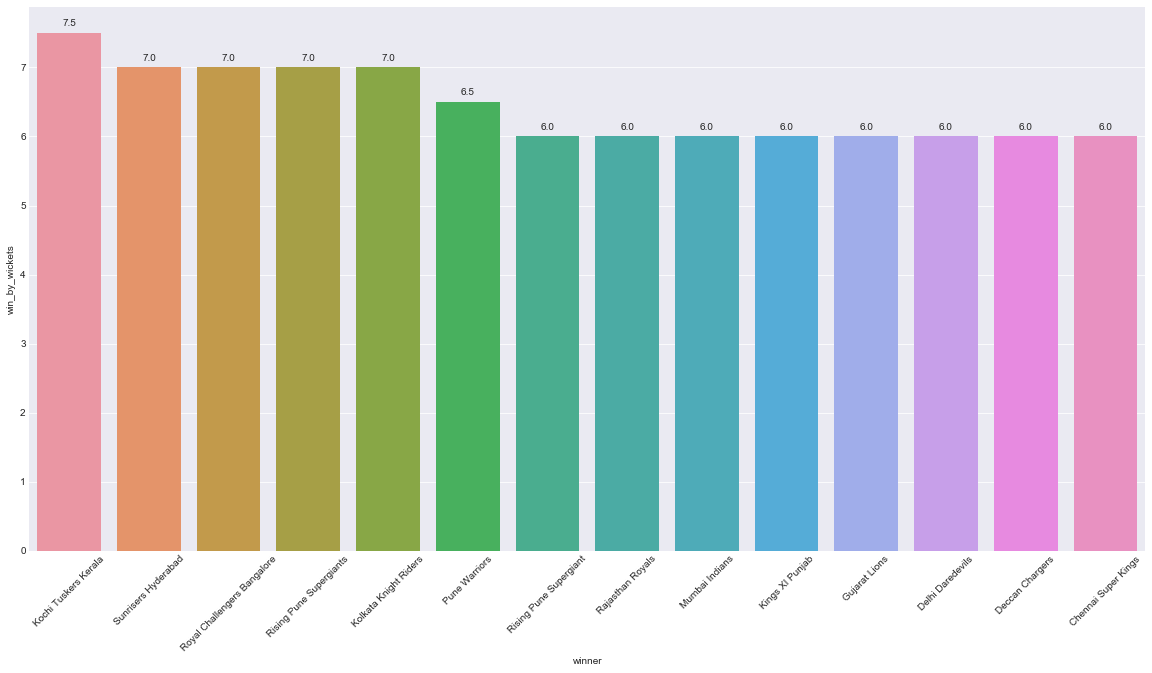

In [115]:
fig,ax = plt.subplots(figsize=(20,10))
graph = sns.barplot(x=team_won_wicket.index,y=team_won_wicket)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.show()

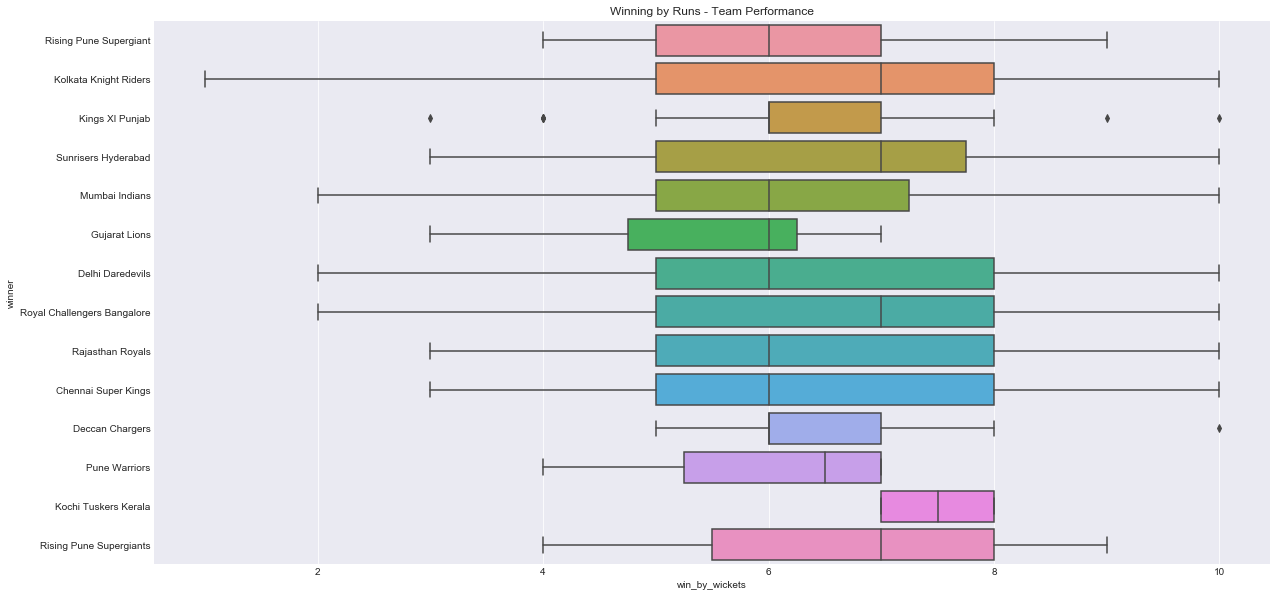

In [116]:
fig, ax = plt.subplots(figsize=(20,10))

ax.set_title("Winning by Runs - Team Performance")

sns.boxplot(y = 'winner', x = 'win_by_wickets', data=matches[matches['win_by_wickets']>0], orient = 'h'); #palette="Blues");
plt.show()